In [2]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
data = pd.read_csv('./final/(0420)삼치_outlier_delete.csv')

In [9]:
data = data.drop(['Unnamed: 0'],axis=1)

In [10]:
data

,species,from,date,qty,1kg price,year,month,day
0,(선)삼치,통영,2006.03.21,169.5,4900.00,2006,3,21
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00,2006,3,21
2,(선)삼치,통영,2006.03.22,8.0,750.00,2006,3,22
3,(선)삼치,부산(기장),2006.03.22,49.4,3900.00,2006,3,22
4,(선)삼치,부산(기장),2006.03.22,480.0,1625.00,2006,3,22
...,...,...,...,...,...,...,...,...
55245,(선)삼치,여수,2021.04.05,400.0,3690.00,2021,4,5
55246,(선)삼치,여수,2021.04.07,20.0,2000.00,2021,4,7
55247,(선)삼치,포항,2021.04.07,22.0,5000.00,2021,4,7
55248,(선)삼치,포항,2021.04.07,30.0,5333.33,2021,4,7


In [12]:
grouped = data.groupby('year')
year = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})

In [14]:
year

,qty,1kg price
year,,
2006,2686275.83,1591.260387
2007,4384361.90,1427.553811
2008,3723067.20,1809.729969
2009,3396486.00,1984.558533
2010,3470663.55,1777.378261
2011,2897630.78,2278.936594
2012,2364834.30,2429.829574
2013,2857634.40,2146.841968
2014,2939052.40,2357.245769


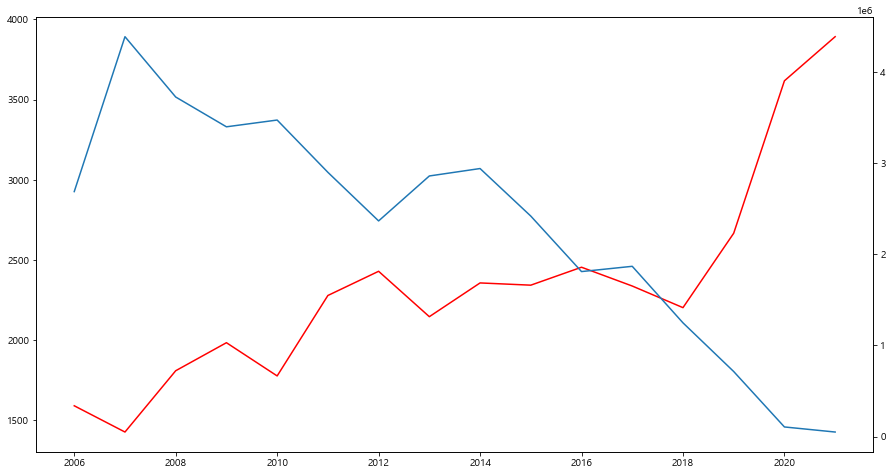

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
fig, ax1 = plt.subplots()
ax1.plot(year.index,year['1kg price'],'red')
ax2 = ax1.twinx()
ax2.plot(year.index,year['qty'])
plt.show()

In [15]:
year.corr(method='pearson')

,qty,1kg price
qty,1.000000,-0.876721
1kg price,-0.876721,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55250 entries, 0 to 55249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    55250 non-null  object 
 1   from       55250 non-null  object 
 2   date       55250 non-null  object 
 3   qty        55250 non-null  float64
 4   1kg price  55250 non-null  float64
 5   year       55250 non-null  object 
 6   month      55250 non-null  object 
 7   day        55250 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB


In [25]:
data = data.astype({'year':str,'month':str,'day':str})

In [27]:
data['date2'] = data['year'].str.cat(data['month'],sep='.')

In [28]:
data

,species,from,date,qty,1kg price,year,month,day,date2
0,(선)삼치,통영,2006.03.21,169.5,4900.00,2006,3,21,2006.3
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00,2006,3,21,2006.3
2,(선)삼치,통영,2006.03.22,8.0,750.00,2006,3,22,2006.3
3,(선)삼치,부산(기장),2006.03.22,49.4,3900.00,2006,3,22,2006.3
4,(선)삼치,부산(기장),2006.03.22,480.0,1625.00,2006,3,22,2006.3
...,...,...,...,...,...,...,...,...,...
55245,(선)삼치,여수,2021.04.05,400.0,3690.00,2021,4,5,2021.4
55246,(선)삼치,여수,2021.04.07,20.0,2000.00,2021,4,7,2021.4
55247,(선)삼치,포항,2021.04.07,22.0,5000.00,2021,4,7,2021.4
55248,(선)삼치,포항,2021.04.07,30.0,5333.33,2021,4,7,2021.4


In [93]:
grouped = data.groupby('from')
date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
date.sort_values('qty')

,qty,1kg price
from,,
남해,1178429.40,1227.624613
강구,1410390.30,2373.628991
포항,1581338.64,2472.265913
마산,2319797.00,2584.494672
통영,4294258.74,1947.056194
삼천포,5435341.68,2201.631284
여수,6316507.90,2083.606650
부산(기장),14397500.00,2156.397288


In [96]:
data_raw = data.copy()

In [97]:
a = date[date['qty']<2000000].index
test1 = pd.DataFrame()
for i in a.values :
    test = data[data['from'] == i]
    test1 = test1.append(test)
data = data.drop(test1.index, axis=0)

In [98]:
grouped = data.groupby('from')
date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
date.sort_values('qty')

,qty,1kg price
from,,
마산,2319797.00,2584.494672
통영,4294258.74,1947.056194
삼천포,5435341.68,2201.631284
여수,6316507.90,2083.606650
부산(기장),14397500.00,2156.397288


In [31]:
y = np.arange(2006,2022,1)
y

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [99]:
where =[]
for i in y :
    i = str(i)
    fil = data[data['year']== i]
    grouped = fil.groupby('from')
    date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
    where.append(date)

In [38]:
len(where)

16

In [40]:
num2 = np.arange(0,16,1)
num2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

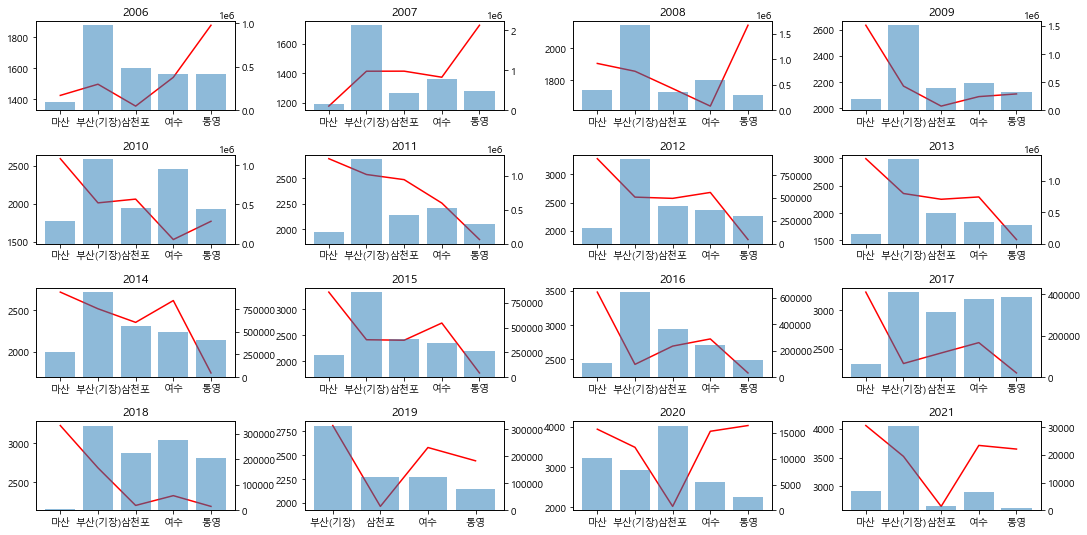

In [100]:
fig, ax1 = plt.subplots(figsize=(18,9),nrows=4, ncols=4)
for j in num2 :
    row = j//4
    col = j%4
    ax1[row,col].plot(where[j].index,where[j]['1kg price'],'red')
    ax2 = ax1[row,col].twinx()
    ax2.bar(where[j].index,where[j]['qty'], alpha=0.5)
    plt.title(y[j])
    plt.subplots_adjust(hspace=0.5,wspace=0.35)

In [108]:
year =[]
for i in y :
    i = str(i)
    data['month'] = data['month'].astype(int)
    fil = data[data['year']== i]
    grouped = fil.groupby('month')
    date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
    date = date.sort_values('month')
    year.append(date)

In [107]:
len(year)

16

In [109]:
x = year[1].index.values.astype(int)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

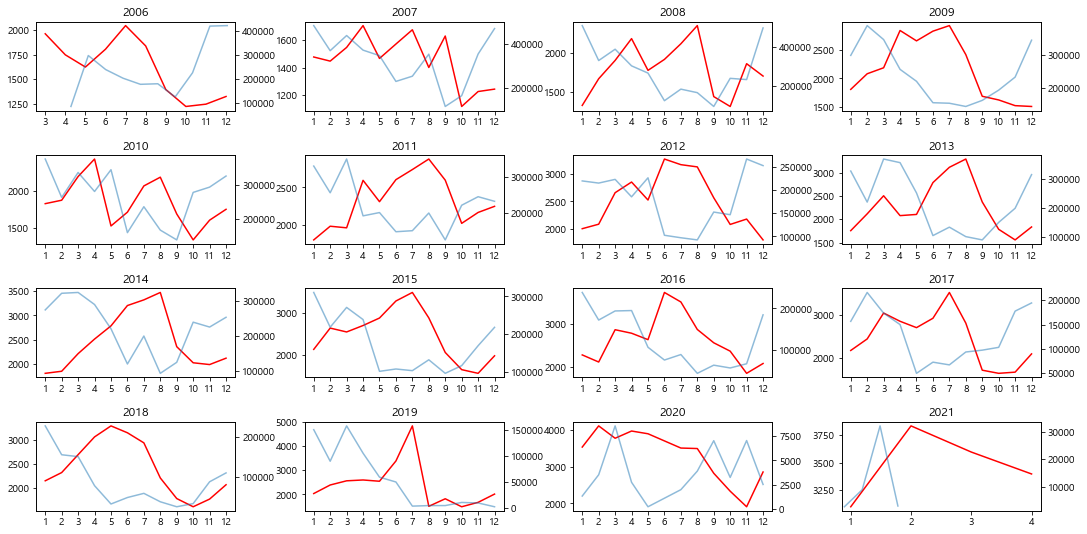

In [110]:
fig, ax1 = plt.subplots(figsize=(18,9),nrows=4, ncols=4)
for j in num2 :
    row = j//4
    col = j%4
    ax1[row,col].plot(year[j].index,year[j]['1kg price'],'red')
    ax2 = ax1[row,col].twinx()
    ax2.plot(year[j].index,year[j]['qty'], alpha=0.5)
    plt.title(y[j])
    plt.xticks(x)
    plt.subplots_adjust(hspace=0.5,wspace=0.35)

In [123]:
month = data['date2'].unique()

In [127]:
year_f =pd.DataFrame()
for i in month :
    i = str(i)
    fil = data[data['date2']== i]
    grouped = fil.groupby('date2')
    date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
    year_f=year_f.append(date)

In [133]:
corr = year_f.corr(method='pearson')
corr

,qty,1kg price
qty,1.000000,-0.559522
1kg price,-0.559522,1.000000


In [129]:
year_f.round(2)

,qty,1kg price
date2,,
2006.3,86437.7,1962.88
2006.4,298736.3,1748.05
2006.5,240269.6,1623.46
2006.6,204224.7,1805.46
2006.7,178795.2,2046.28
...,...,...
2020.12,2541.5,2857.87
2021.1,2609.5,3100.84
2021.2,8868.4,3832.11


In [131]:
data.shape

(43149, 9)